### This notebook is used to show how the data of sensitivity matrix is exported for plotting in Datagraph 


In [73]:
## Import all the files here 

from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [74]:
# Importing the model here 
# Step actually Nnt required
model_degtag = Model(sbml_filename = 'GEAGS_biocrnpyler_degtag_070824.xml')
model_no_tag = Model(sbml_filename = 'GEAGS_biocrnpyler_no_degtag_070824.xml')

# Defining the simulation runtime parameters
N_steps = 50
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)
tf_i = 720  # Indice for the last wanted timepoint 

In [75]:
# Loading the stored SSM datafiles 

SSM_deg = loaded_array = np.load('SSM_deg_abs_072824.npy')
SSM_no_deg = loaded_array = np.load('SSM_no_tag_abs_072824.npy')


tf_I = int(len(SSM_deg) * 0.72) # Last indice from the time axis in the SSM

# Saving the first 720 mins of data
SSM_deg = SSM_deg[:tf_I,:]
SSM_no_deg = SSM_no_deg[:tf_I,:]

# Printing the shape of the SSM to check 

np.shape(SSM_deg)

(36, 42, 28)

In [76]:
# Obtaining the parameters and number of parameters in each model for further analysis

a_deg = model_degtag.get_parameter_values()
Np_deg = len(a_deg)

a_no_deg = model_no_tag.get_parameter_values()
Np_no_deg = len(a_no_deg)

i_protein = 10

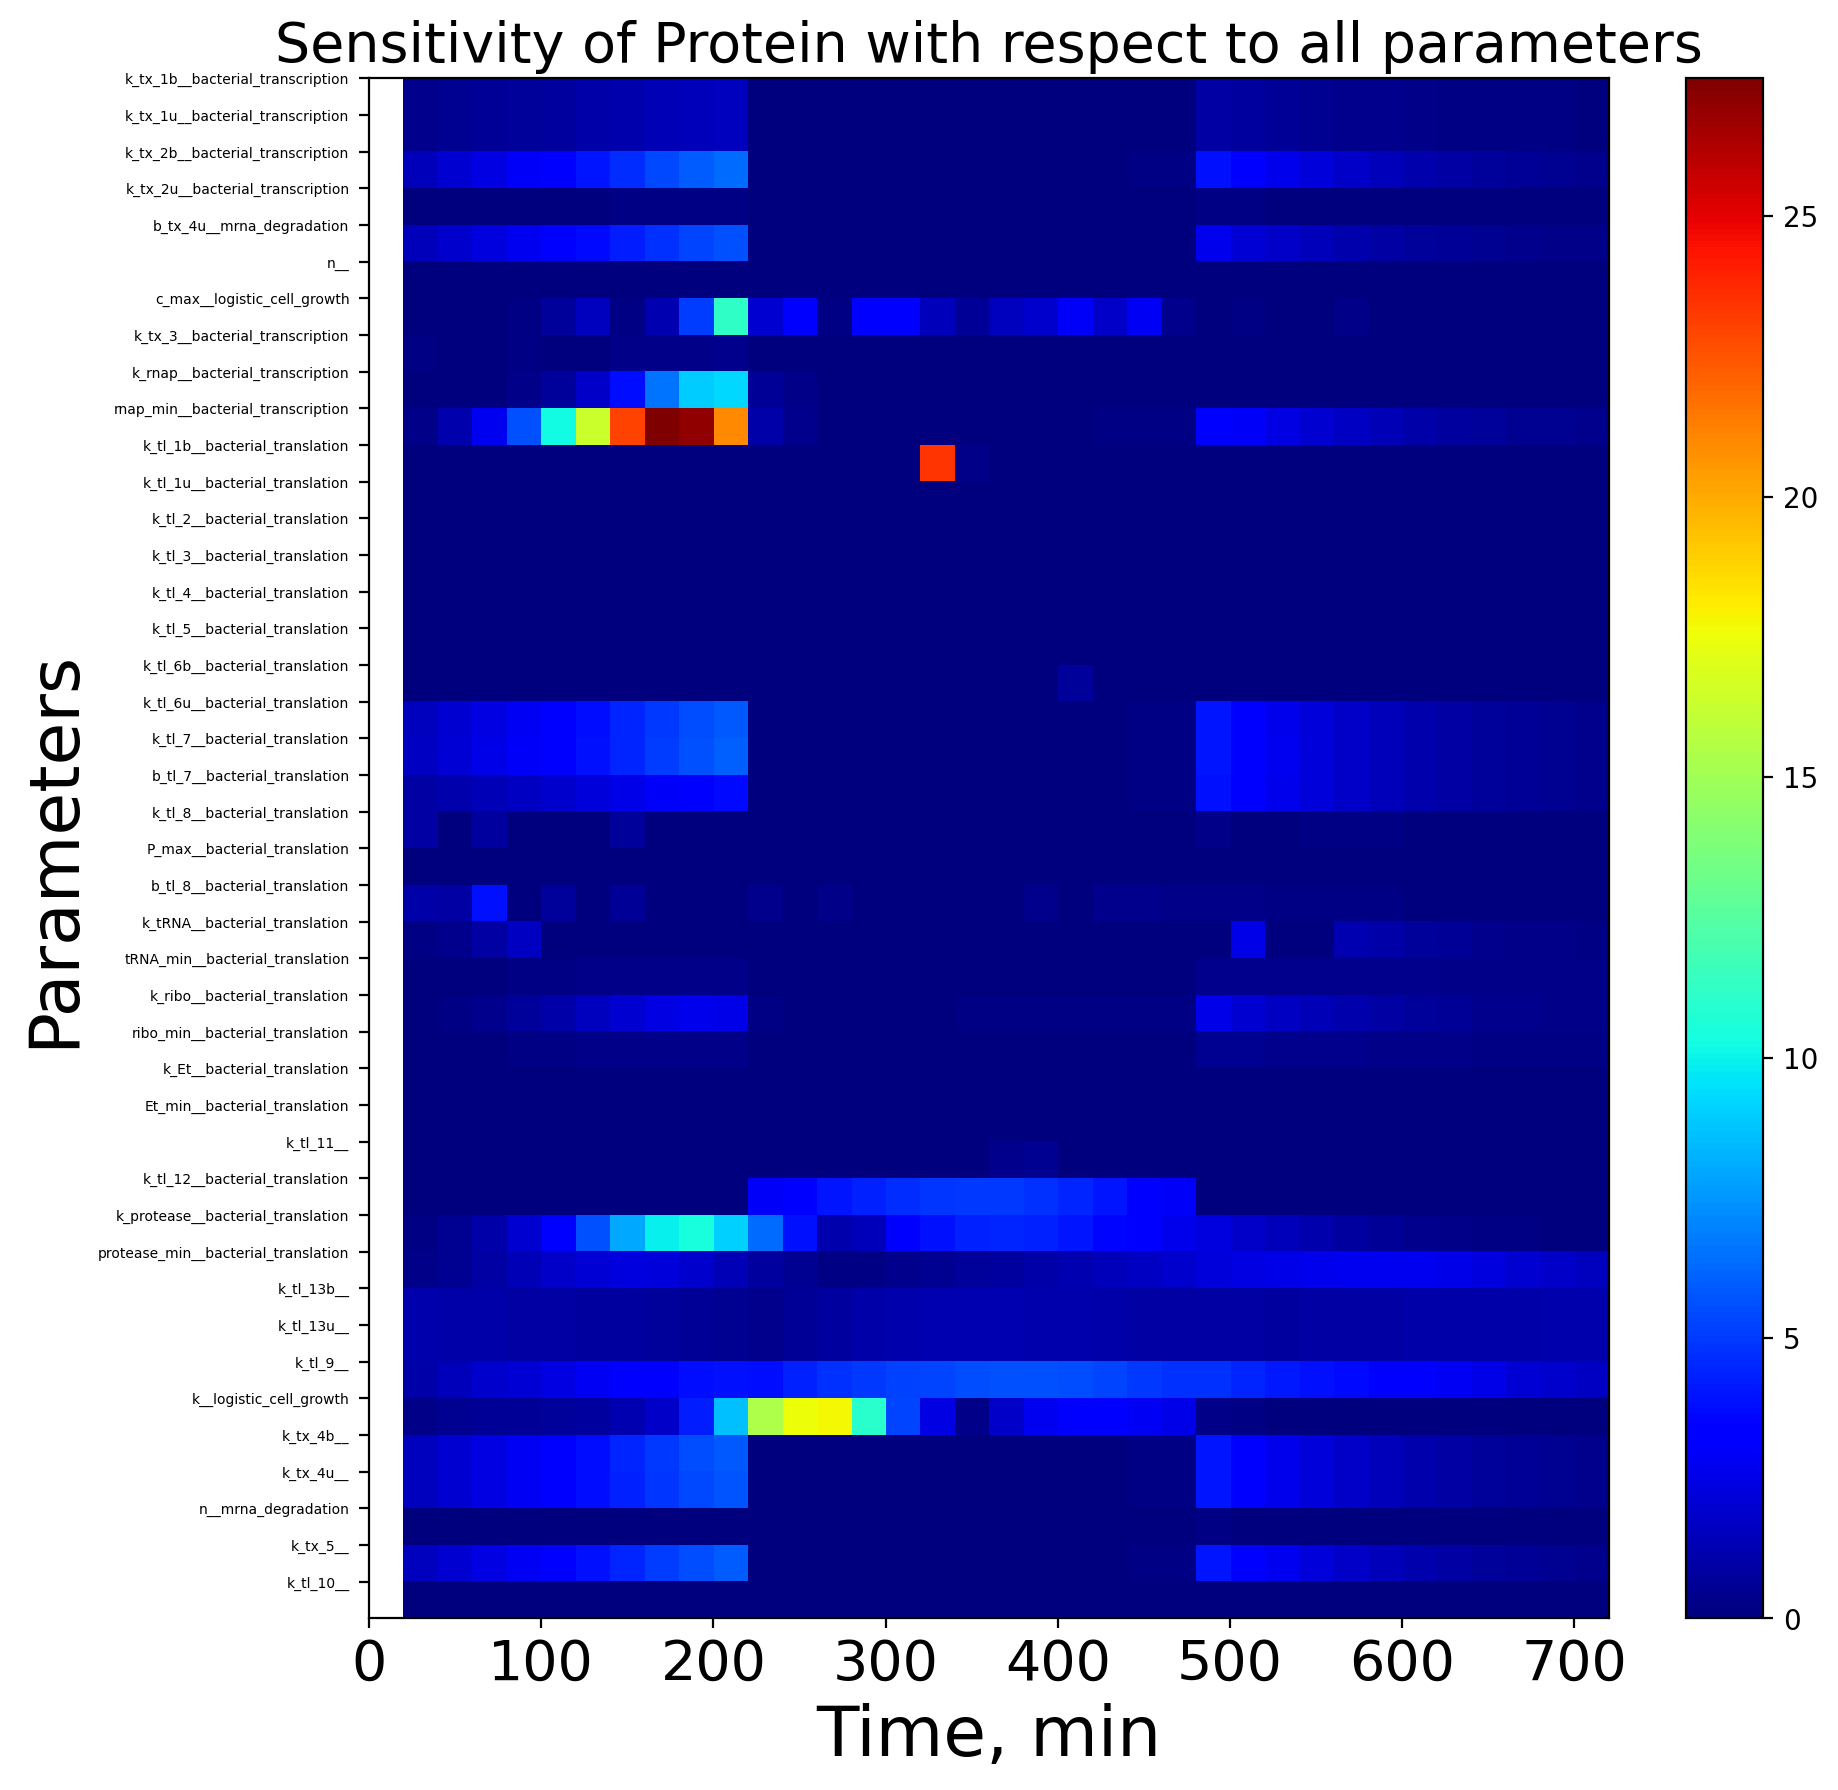

In [77]:
## Plotting the SSM with degtag

fig, axs = plt.subplots(1,1, figsize = (10,10), sharex = 'col')
h00 = axs.imshow(np.abs(SSM_deg[:,:,i_protein].T), cmap = 'jet', interpolation = 'nearest', aspect = 'auto' , extent = [0,tf_i,Np_deg,0])
fig.colorbar(h00, ax = axs)
axs.set_ylabel('Parameters', fontsize = 25) ; axs.set_xlabel('Time, min', fontsize = 25)
#axs.yticks(list(model_degtag.get_parameter_dictionary().keys()), fontsize = 5)
axs.set_title('Sensitivity of Protein with respect to all parameters', fontsize = 20)
plt.xticks(fontsize = 20)
y_ticks = list(model_degtag.get_parameter_dictionary().keys())
plt.yticks(range(len(y_ticks)), y_ticks, rotation='horizontal', fontsize = 5);

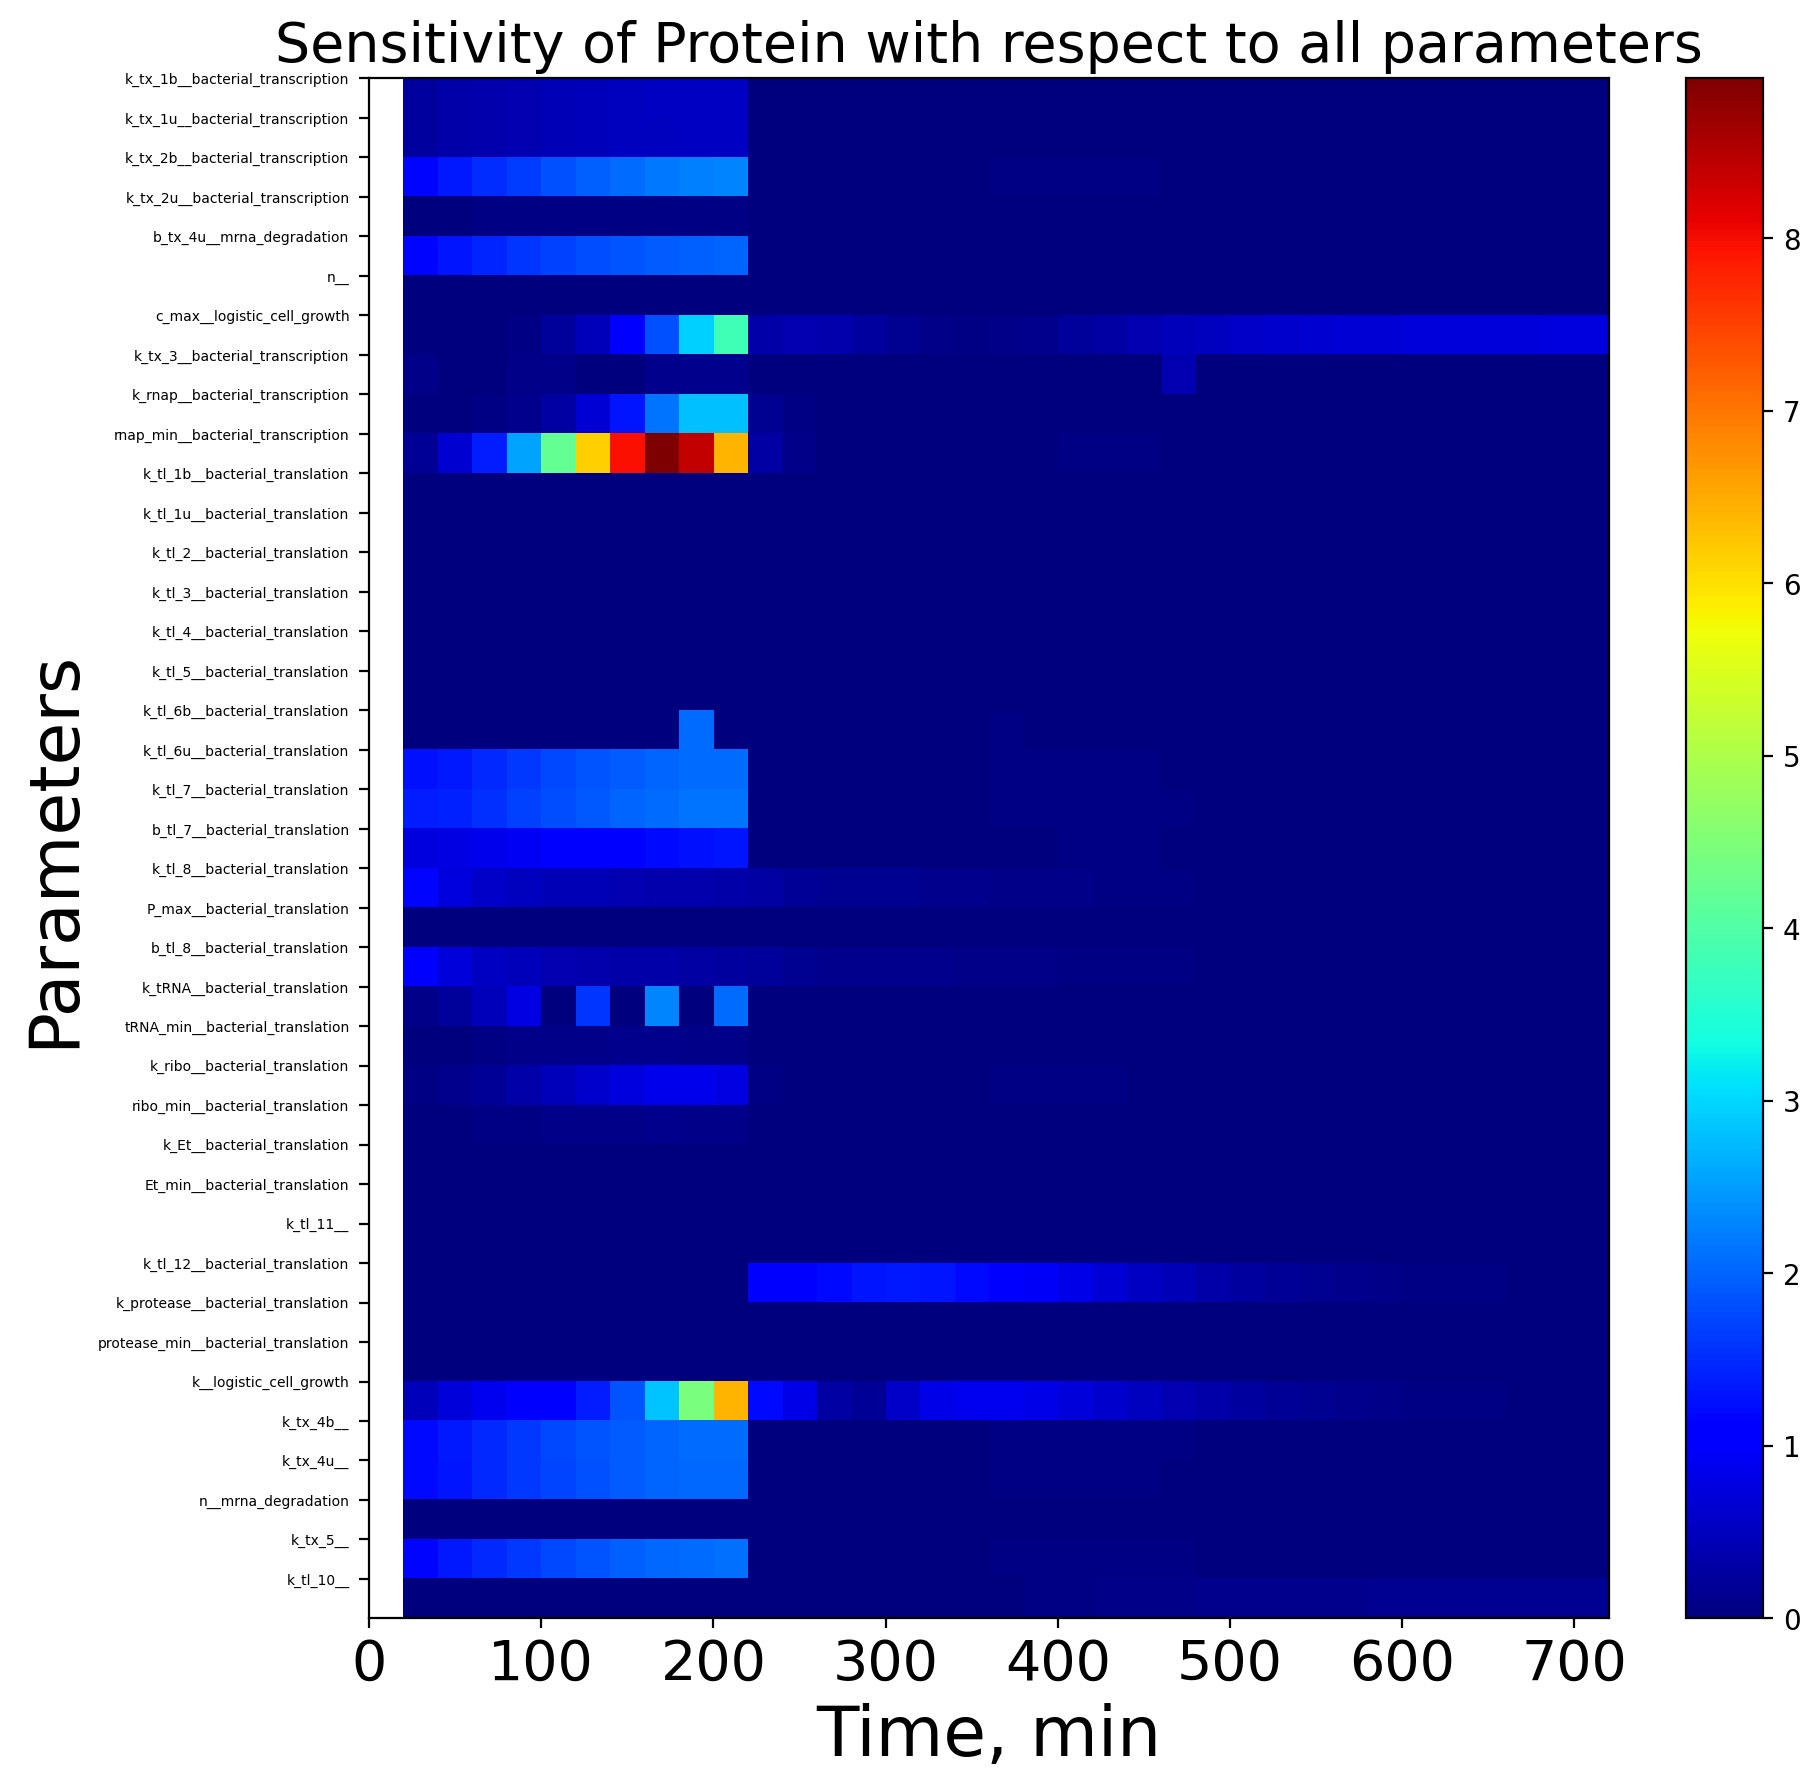

In [78]:
## Plotting the SSM without degtag

fig, axs = plt.subplots(1,1, figsize = (10,10), sharex = 'col')
h00 = axs.imshow(np.abs(SSM_no_deg[:,:,i_protein].T), cmap = 'jet', interpolation = 'nearest', aspect = 'auto', extent = [0,tf_i,Np_no_deg,0])
fig.colorbar(h00, ax = axs)
axs.set_ylabel('Parameters', fontsize = 25) ; axs.set_xlabel('Time, min', fontsize = 25)
#axs.yticks(list(model_degtag.get_parameter_dictionary().keys()), fontsize = 5)
axs.set_title('Sensitivity of Protein with respect to all parameters', fontsize = 20)
plt.xticks(fontsize = 20)
y_ticks = list(model_no_tag.get_parameter_dictionary().keys())
plt.yticks(range(len(y_ticks)), y_ticks, rotation='horizontal', fontsize = 5);

### Preparing data to be exported to datagraph 
Datagraph is a plotting tool and it can plot heatmaps if we give the data in certain format. The 2d array needs to flattened out to 1d and we need to provide labels for each axes in a flattened format. 
For example an array of form: <br>
....A...B...C <br>
P...1...2...3 <br>
Q...4...5...6 <br>
R...7...8...9 <br>

We need to provide 3 arrays that look like: <br> <br>

x = [A, B, C, A, B, C, A, B, C] <br>
y = [P, P, P, Q, Q, Q, R, R, R] <br>
z = [1, 2, 3, 4, 5, 6, 7, 8, 9] <br>

In [80]:
## Preparing for SSM with degtag: 

# Flatten the sensitivity matrix
z = np.abs(SSM_deg[:,:,i_protein].T).flatten()

param_list = np.array(list(model_degtag.get_parameter_dictionary().keys()))

# Create x and y using meshgrid and flattening
timepoints_repeated = np.tile(timepoints[:tf_I], len(param_list))
parameters_repeated = np.repeat(param_list, len(timepoints[:tf_I]))

# Convert to lists
y = parameters_repeated.tolist()
x = timepoints_repeated.tolist()
z = z.tolist()

heat_map = dict()
heat_map['x'] = x
heat_map['y'] = y
heat_map['z'] = z

heat_map_df = pd.DataFrame(data = heat_map)
#heat_map_df.to_csv('SSM_deg_to_datagrap.csv') # un-comment when needed

np.shape(z)

(1512,)

In [81]:
## Preparing for SSM without degtag: 

# Flatten the sensitivity matrix
z = np.abs(SSM_no_deg[:,:,i_protein].T).flatten()

param_list = np.array(list(model_no_tag.get_parameter_dictionary().keys()))

# Create x and y using meshgrid and flattening
timepoints_repeated = np.tile(timepoints[:tf_I], len(param_list))
parameters_repeated = np.repeat(param_list, len(timepoints[:tf_I]))

# Convert to lists
y = parameters_repeated.tolist()
x = timepoints_repeated.tolist()
z = z.tolist()

heat_map = dict()
heat_map['x'] = x
heat_map['y'] = y
heat_map['z'] = z

heat_map_df = pd.DataFrame(data = heat_map)
#heat_map_df.to_csv('SSM_no_deg_to_datagrap.csv') # un-comment when needed

np.shape(z)

(1404,)